In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import openpyxl as xl
import time
from geopy.geocoders import Nominatim
from shapely.geometry import Point, Polygon, LineString, shape
from shapely.geometry.polygon import Polygon
import pprint
import json
import numpy as np
import pyproj
import os

In [2]:
map_GJ= gpd.GeoDataFrame.from_file('./LSMD_CONT_LDREG_서울_광진구/LSMD_CONT_LDREG_11215.shp', encoding='cp949')
map_GJ

,sgg_oid,jibun,bchk,pnu,col_adm_se,geometry
0,201793,18-54 공,1,1121510200100180054,11215,"POLYGON ((207056.900 550304.134, 207056.161 55..."
1,83707,135-19도,1,1121510200101350019,11215,"POLYGON ((207250.092 550332.795, 207255.628 55..."
2,83772,135-35대,1,1121510200101350035,11215,"POLYGON ((207267.052 550312.245, 207272.349 55..."
3,83473,143대,1,1121510200101430000,11215,"POLYGON ((207122.576 550390.448, 207132.447 55..."
4,92539,553-59도,1,1121510500105530059,11215,"POLYGON ((205770.324 548585.328, 205772.210 54..."
...,...,...,...,...,...,...
32682,99225,57-96도,1,1121510500100570096,11215,"POLYGON ((205710.204 548334.265, 205720.722 54..."
32683,94139,720도,1,1121510500107200000,11215,"POLYGON ((207095.500 548255.308, 207114.035 54..."
32684,94140,721-1도,1,1121510500107210001,11215,"POLYGON ((207272.502 548255.311, 207269.603 54..."
32685,94141,721도,1,1121510500107210000,11215,"POLYGON ((207297.885 548255.311, 207300.293 54..."


In [3]:
print(map_GJ.crs)

None


In [4]:
map_GJ.set_crs(epsg=5186, inplace=True)
map_GJ = map_GJ.to_crs(epsg=4326)
map_GJ = map_GJ.to_crs({'init':'epsg:4326'})

C:\Users\bbcc6\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [5]:
map_GJ

,sgg_oid,jibun,bchk,pnu,col_adm_se,geometry
0,201793,18-54 공,1,1121510200100180054,11215,"POLYGON ((127.07986 37.55223, 127.07985 37.552..."
1,83707,135-19도,1,1121510200101350019,11215,"POLYGON ((127.08205 37.55249, 127.08211 37.552..."
2,83772,135-35대,1,1121510200101350035,11215,"POLYGON ((127.08224 37.55230, 127.08230 37.552..."
3,83473,143대,1,1121510200101430000,11215,"POLYGON ((127.08061 37.55301, 127.08072 37.552..."
4,92539,553-59도,1,1121510500105530059,11215,"POLYGON ((127.06529 37.53675, 127.06531 37.536..."
...,...,...,...,...,...,...
32682,99225,57-96도,1,1121510500100570096,11215,"POLYGON ((127.06461 37.53449, 127.06473 37.534..."
32683,94139,720도,1,1121510500107200000,11215,"POLYGON ((127.08028 37.53377, 127.08049 37.533..."
32684,94140,721-1도,1,1121510500107210001,11215,"POLYGON ((127.08228 37.53377, 127.08225 37.533..."
32685,94141,721도,1,1121510500107210000,11215,"POLYGON ((127.08257 37.53377, 127.08260 37.533..."


In [6]:
snC_GJ= pd.read_csv("./서울특별시_광진구_경로당 현황_20230208.csv" ,encoding='cp949', dtype=str)
snC_GJ.head()

,연번,행정동,형태,경로당명,전화번호,주소,회원수(남),회원수(여),회원수(총원),경로당설립일
0,1,중곡1동,구립,중곡1동 제1,02-467-0014,"서울특별시 광진구 긴고랑로5길 10(중곡동, 중곡1동 제1경로당)",7,30,37,1994-06-01
1,2,중곡1동,구립,중곡1동 제2,02-465-2104,"서울특별시 광진구 긴고랑로8길 51(중곡동, 중곡1동 제2경로당)",22,14,36,2003-09-01
2,3,중곡2동,구립,한마음,02-444-0652,"서울특별시 광진구 긴고랑로22길 39-4(중곡동, 한마음경로당)",9,23,32,1989-06-01
3,4,중곡2동,구립,장수,02-454-3811,"서울특별시 광진구 긴고랑로31길 44(중곡동, 장수경로당)",0,22,22,2006-11-01
4,5,중곡3동,구립,용마,02-466-1020,"서울특별시 광진구 용마산로31길 38-8 (중곡동, 용마경로당)",5,30,35,1989-06-01


In [7]:
list1 = snC_GJ['주소']
list1

0        서울특별시 광진구 긴고랑로5길 10(중곡동, 중곡1동 제1경로당)
1        서울특별시 광진구 긴고랑로8길 51(중곡동, 중곡1동 제2경로당)
2         서울특별시 광진구 긴고랑로22길 39-4(중곡동, 한마음경로당)
3            서울특별시 광진구 긴고랑로31길 44(중곡동, 장수경로당)
4         서울특별시 광진구 용마산로31길 38-8 (중곡동, 용마경로당)
                       ...                   
92           서울특별시 광진구 동일로52길 27 (군자동, 군자경로당)
93            서울특별시 광진구 동일로42길 2 (군자동, 양마경로당)
94        서울특별시 광진구 군자로13길 35 (군자동, 양마제2 경로당)
95    서울특별시 광진구 광나루로17길 28 102호 (군자동, 복조리경로당)
96     서울특별시 광진구 군자로12길 46 (군자동, 일성파크아파트 경로당)
Name: 주소, Length: 97, dtype: object

In [8]:
list2 = []
for adress in list1:
    list2.append(adress[0:adress.index("(")])
list2

['서울특별시 광진구 긴고랑로5길 10',
 '서울특별시 광진구 긴고랑로8길 51',
 '서울특별시 광진구 긴고랑로22길 39-4',
 '서울특별시 광진구 긴고랑로31길 44',
 '서울특별시 광진구 용마산로31길 38-8 ',
 '서울특별시 광진구 동일로80길 20 ',
 '서울특별시 광진구 긴고랑로39길 57 ',
 '서울특별시 광진구 용마산28길 31 ',
 '서울특별시 광진구 긴고랑로36길 57-27 ',
 '서울특별시 광진구 용마산로24길 13 ',
 '서울특별시 광진구 천호대로112길 70 ',
 '서울특별시 광진구 광나루로40길 6 ',
 '서울특별시 광진구 자양로26길 20-5 ',
 '서울특별시 광진구 광나루로30가길 27 ',
 '서울특별시 광진구 자양로26길 71 ',
 '서울특별시 광진구 자양로47길 9-4 ',
 '서울특별시 광진구 자양로37길 85 ',
 '서울특별시 광진구 자양로38길 17-5 ',
 '서울특별시 광진구 광나루로 545',
 '서울특별시 광진구 구의강변로3길 39 ',
 '서울특별시 광진구 아차산로63길 21 ',
 '서울특별시 광진구 구의강변로42 ',
 '서울특별시 광진구 광나루로56길 32 ',
 '서울특별시 광진구 구의강변로94 ',
 '서울특별시 광진구 구의강변로3가길 39 ',
 '서울특별시 광진구 광나루로56길 29 ',
 '서울특별시 광진구 구의강변로84 ',
 '서울특별시 광진구 구의강변로 64 ',
 '서울특별시 광진구 아차산로 630, 2층',
 '서울특별시 광진구 아차산로73길 15 ',
 '서울특별시 광진구 아차산로78길 67 ',
 '서울특별시 광진구 아차산로76길 31 ',
 '서울특별시 광진구 아차산로 552 ',
 '서울특별시 광진구 아차산로 552 ',
 '서울특별시 광진구 아차산로70길 62 ',
 '서울특별시 광진구 아차산로70길 61 ',
 '서울특별시 광진구 아차산로 522 ',
 '서울특별시 광진구 아차산로69길 19',
 '서울특별시 광진구 아차산로549 ',
 '서울특별시 

In [65]:
list3 = []
for adress in list2:
    if "," in adress != False:
        list3.append(adress[0:adress.index(",")])
    else:
        list3.append(adress[:])
list3[95] = '서울특별시 광진구 광나루로17길 28'
list3

['서울특별시 광진구 긴고랑로5길 10',
 '서울특별시 광진구 긴고랑로8길 51',
 '서울특별시 광진구 긴고랑로22길 39-4',
 '서울특별시 광진구 긴고랑로31길 44',
 '서울특별시 광진구 용마산로31길 38-8 ',
 '서울특별시 광진구 동일로80길 20 ',
 '서울특별시 광진구 긴고랑로39길 57 ',
 '서울특별시 광진구 용마산28길 31 ',
 '서울특별시 광진구 긴고랑로36길 57-27 ',
 '서울특별시 광진구 용마산로24길 13 ',
 '서울특별시 광진구 천호대로112길 70 ',
 '서울특별시 광진구 광나루로40길 6 ',
 '서울특별시 광진구 자양로26길 20-5 ',
 '서울특별시 광진구 광나루로30가길 27 ',
 '서울특별시 광진구 자양로26길 71 ',
 '서울특별시 광진구 자양로47길 9-4 ',
 '서울특별시 광진구 자양로37길 85 ',
 '서울특별시 광진구 자양로38길 17-5 ',
 '서울특별시 광진구 광나루로 545',
 '서울특별시 광진구 구의강변로3길 39 ',
 '서울특별시 광진구 아차산로63길 21 ',
 '서울특별시 광진구 구의강변로42 ',
 '서울특별시 광진구 광나루로56길 32 ',
 '서울특별시 광진구 구의강변로94 ',
 '서울특별시 광진구 구의강변로3가길 39 ',
 '서울특별시 광진구 광나루로56길 29 ',
 '서울특별시 광진구 구의강변로84 ',
 '서울특별시 광진구 구의강변로 64 ',
 '서울특별시 광진구 아차산로 630',
 '서울특별시 광진구 아차산로73길 15 ',
 '서울특별시 광진구 아차산로78길 67 ',
 '서울특별시 광진구 아차산로76길 31 ',
 '서울특별시 광진구 아차산로 552 ',
 '서울특별시 광진구 아차산로 552 ',
 '서울특별시 광진구 아차산로70길 62 ',
 '서울특별시 광진구 아차산로70길 61 ',
 '서울특별시 광진구 아차산로 522 ',
 '서울특별시 광진구 아차산로69길 19',
 '서울특별시 광진구 아차산로549 ',
 '서울특별시 광진구 

In [66]:
geo_local = Nominatim(user_agent='South Korea')

# 위도, 경도 반환하는 함수
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [69]:
latitude = []
longitude =[]

for i in list3:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

#####Dataframe만들기######
snC_GJ_map = pd.DataFrame({'행정동': snC_GJ['행정동'],'경로당명':snC_GJ['경로당명'], '주소':list3,'회원수(총원)':snC_GJ['회원수(총원)'],
                           '위도':latitude,'경도':longitude})


In [70]:
snC_GJ_map

,행정동,경로당명,주소,회원수(총원),위도,경도
0,중곡1동,중곡1동 제1,서울특별시 광진구 긴고랑로5길 10,37,37.564229,127.078800
1,중곡1동,중곡1동 제2,서울특별시 광진구 긴고랑로8길 51,36,37.561565,127.078102
2,중곡2동,한마음,서울특별시 광진구 긴고랑로22길 39-4,32,37.560644,127.084258
3,중곡2동,장수,서울특별시 광진구 긴고랑로31길 44,22,37.561130,127.086937
4,중곡3동,용마,서울특별시 광진구 용마산로31길 38-8,35,37.569145,127.084828
...,...,...,...,...,...,...
92,군자동,군자,서울특별시 광진구 동일로52길 27,55,37.554552,127.072090
93,군자동,양마,서울특별시 광진구 동일로42길 2,39,37.552675,127.070542
94,군자동,양마제2,서울특별시 광진구 군자로13길 35,40,37.552432,127.071189
95,군자동,복조리,서울특별시 광진구 광나루로17길 28,41,37.548796,127.072711


In [62]:
snC_GJ_map[snC_GJ_map['위도'] == 0]

,행정동,경로당명,주소,회원수(총원),위도,경도
7,중곡4동,용곡,서울특별시 광진구 용마산28길 31,25,0.0,0.0
20,구의3동,산의마을,서울특별시 광진구 아차산로63길 21,37,0.0,0.0
21,구의3동,강변우성,서울특별시 광진구 구의강변로42,25,0.0,0.0
23,구의3동,구의현대6차,서울특별시 광진구 구의강변로94,23,0.0,0.0
26,구의3동,세양,서울특별시 광진구 구의강변로84,25,0.0,0.0
38,광장동,광장현대10차,서울특별시 광진구 아차산로549,20,0.0,0.0
40,광장동,광장현대12차,서울특별시 광진구 천호대로808,20,0.0,0.0
45,광장동,금호,서울특별시 광진구 광나루로579,32,0.0,0.0
84,자양4동,자양4동 제4,서울특별시 광진구 뚝섬로30가길 18,45,0.0,0.0
85,자양4동,노유산,서울특별시 광진구 동일로10가길 15-2,35,0.0,0.0


In [72]:
snC_GJ_map['경도'] =snC_GJ_map['경도'].astype(float)
snC_GJ_map['위도'] = snC_GJ_map['위도'].astype(float)
snC_GJ_map['geometry'] = snC_GJ_map.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
snC_GJ_map = gpd.GeoDataFrame(snC_GJ_map, geometry='geometry')


In [73]:
snC_GJ_map.crs = {'init':'epsg:4326'}
print(snC_GJ_map.crs)

+init=epsg:4326 +type=crs


C:\Users\bbcc6\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [74]:
print(snC_GJ_map.crs)

+init=epsg:4326 +type=crs


In [75]:
snC_GJ_map

,행정동,경로당명,주소,회원수(총원),위도,경도,geohttps://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6metry,geometry
0,중곡1동,중곡1동 제1,서울특별시 광진구 긴고랑로5길 10,37,37.564229,127.078800,POINT (127.0788004 37.5642294),POINT (127.07880 37.56423)
1,중곡1동,중곡1동 제2,서울특별시 광진구 긴고랑로8길 51,36,37.561565,127.078102,POINT (127.078102 37.561565),POINT (127.07810 37.56157)
2,중곡2동,한마음,서울특별시 광진구 긴고랑로22길 39-4,32,37.560644,127.084258,POINT (127.0842583 37.5606438),POINT (127.08426 37.56064)
3,중곡2동,장수,서울특별시 광진구 긴고랑로31길 44,22,37.561130,127.086937,POINT (127.0869371 37.5611298),POINT (127.08694 37.56113)
4,중곡3동,용마,서울특별시 광진구 용마산로31길 38-8,35,37.569145,127.084828,POINT (127.0848278 37.5691449),POINT (127.08483 37.56914)
...,...,...,...,...,...,...,...,...
92,군자동,군자,서울특별시 광진구 동일로52길 27,55,37.554552,127.072090,POINT (127.0720904 37.5545518),POINT (127.07209 37.55455)
93,군자동,양마,서울특별시 광진구 동일로42길 2,39,37.552675,127.070542,POINT (127.0705417 37.5526747),POINT (127.07054 37.55267)
94,군자동,양마제2,서울특별시 광진구 군자로13길 35,40,37.552432,127.071189,POINT (127.0711893 37.5524317),POINT (127.07119 37.55243)
95,군자동,복조리,서울특별시 광진구 광나루로17길 28,41,37.548796,127.072711,POINT (127.0727108 37.5487957),POINT (127.07271 37.54880)


In [77]:
print(map_GJ.crs)

+init=epsg:4326 +type=crs


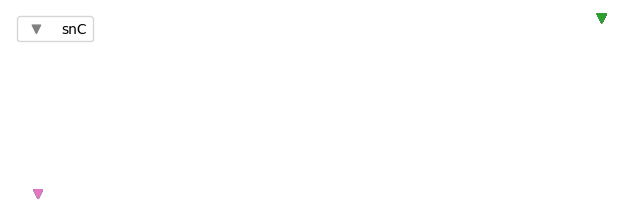

In [78]:
ax = map_GJ.plot(figsize=(8,8), alpha=0.8)
snC_GJ_map.plot(ax=ax, marker='v', column='행정동', label='snC')
ax.set_axis_off()
plt.legend()
plt.show()

In [79]:
snC_GJ_map.to_csv('snC_GJ_map.csv')

## 행정동 별 경로당 수

In [ ]:
new1 = snC_GJ_map.groupby(['행정동']).agg({'경로당명':'count'})
new1.rename(columns={'경로당명':'경로당 수'}, inplace = True)
new1.sort_values('경로당 수',ascending = False, inplace = True)

In [ ]:
new1.loc['총합'] = new1.sum(axis=0)
new1